<a href="https://colab.research.google.com/github/Estebanc0/ADA-Informes/blob/main/Informe_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Descripcion del problema


Problema:Encontrar la suma más grande posible dentro de un arreglo.



Entrada: Secuencia de n números siendo n el tamaño del arreglo con un orden al azar.



Salida: El resultado de la máxima suma posible en el array. 



Este algoritmo podría ser de utilidad para ver la mayor racha de victorias en algún juego

# Descripción del Algoritmo 




Se le entrega al algoritmo un arreglo que puede contener enteros positivos y negativos y se espera que encuentre la suma de subarreglo contiguo de números que tiene la suma más grande.



1- Se divide el array en dos subarrays iguales.



2- Se calcula recursivamente la suma máxima de subarray para el subarray izquierdo.



3- Se calcula recursivamente la suma máxima de subarray para el subarray derecho.



4- Se encuentra la suma máxima del subarray que cruza el elemento del medio.



5- Por último se devuelve el máximo de las tres sumas anteriores.


A continuación el algoritmo y un ejemplo de su ejecución

In [52]:
# Función para encontrar la suma máxima del array usando divide y vencerás
import sys
 

def findMaximumSum(nums, left=None, right=None):
    if not nums:
        return 0
 
    if left is None and right is None:
        left, right = 0, len(nums) - 1
    if right == left:
        return nums[left]

    #encuentra el elememto medio de la lista    
    mid = (left + right) // 2
    leftMax = -sys.maxsize
    total = 0

    #encuentra la maxima suma del lado izquierdo
    for i in range(mid, left - 1, -1):
        total += nums[i]
        if total > leftMax:
            leftMax = total
    rightMax = -sys.maxsize
    total = 0        
 
    #encuentra la maxima suma del lado derecho
    for i in range(mid + 1, right + 1):
        total += nums[i]
        if total > rightMax:
            rightMax = total
    #toma el maximo de la suma máxima de los subarray de la izquierda y de la derecha       
    maxLeftRight = max(findMaximumSum(nums, left, mid),
                    findMaximumSum(nums, mid + 1, right))
    #retorna el maximo de los 3
    return max(maxLeftRight, leftMax + rightMax)

In [51]:
array =[0, 1,-4, 7, 3, 5] 
print("La suma maxima contenida es: ",findMaximumSum(array))


La suma maxima contenida es:  15


In [34]:
# max subarraymid
def maxCrossingSum(arr, l, m, h):
 
    sm = 0
    left_sum = -10000
 
    for i in range(m, l-1, -1):
        sm = sm + arr[i]
 
        if (sm > left_sum):
            left_sum = sm
 

    sm = 0
    right_sum = -1000
    for i in range(m, h + 1):
        sm = sm + arr[i]
 
        if (sm > right_sum):
            right_sum = sm
 

    return max(left_sum + right_sum - arr[m], left_sum, right_sum)
 
 

def maxSubArraySum(arr, l, h):
    if (l > h):
        return -10000
    if (l == h):
        return arr[l]
 

    m = (l + h) // 2
 

    return max(maxSubArraySum(arr, l, m-1),
               maxSubArraySum(arr, m+1, h),
               maxCrossingSum(arr, l, m, h))
 
 

arr = [0, 1,-4, 2, -2,1, 3, 2]
n = len(arr)
 
max_sum = maxSubArraySum(arr, 0, n-1)
print("La suma maxima contenida es: ", max_sum)

La suma maxima contenida es:  6


#Correctitud maxSubArraySum (MaxSubArrayMid)



#Tiempo de ejecución
La complejidad temporal de la solución divide y vencerás es O(n.log(n)) en cuanto al array dado de tamaño n, hacemos dos llamadas recursivos en el tamaño de entrada n/2 y encontrar el punto medio máximo de cruces de subarray, toma O(n) tiempo en el peor de los casos.

# Experimentación

In [11]:
def kadane(A):
 
    # almacena la sublista de suma máxima encontrada hasta el momento
    max_so_far = 0
 
    # almacena la suma máxima de la sublista que termina en la posición actual
    max_ending_here = 0
 
    # recorrer la lista dada
    for i in A:
        # actualice la suma máxima de la sublista "finalizando" en el índice `i` (agregando el
        # elemento actual a la suma máxima que termina en el índice anterior `i-1`)
        max_ending_here = max_ending_here + i
 
        # si la suma máxima es negativa, configúrelo en 0 (lo que representa
        # una sublista vacía)
        max_ending_here = max(max_ending_here, 0)
 
        # actualiza el resultado si se encuentra que la suma de la sublista actual es mayor
        max_so_far = max(max_so_far, max_ending_here)
 
    return max_so_far

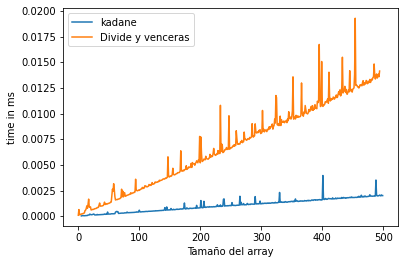

In [15]:
import matplotlib.pyplot as plt
import datetime
import random
from timeit import repeat

x=[]; y=[]; z=[]

for n in range(5,500):

  a = random.sample(range(-1000, 1000), n)

 
  t = repeat(setup="from __main__ import kadane", stmt=f"kadane({a})", repeat=1, number=10)
  h = repeat(setup="from __main__ import findMaximumSum", stmt=f"findMaximumSum({a})", repeat=1, number=10)

  x.append(n)
  y.append(t)
  z.append(h)

plt.plot(x,y,z)
plt.legend(["kadane","Divide y venceras"])
plt.xlabel('Tamaño del array')
plt.ylabel('time in ms')
plt.show()

# Análisis:


El algoritmo de kanade es mucho más eficiente que el de enfoque divide y conquistaras era algo obvio teniendo en cuenta que kanade posee una complejidad temporal de O(n) y el enfoque divide y vencerás una de O(nlogn)

# Comparativa del tiempo de ejecución entre la solución ingenua y el enfoque divide y vencerás

In [12]:
import sys
def ingenua(nums):
 
    maxSum = -sys.maxsize
 
    # do para cada sublista que comience con `i`
    for i in range(len(nums)):
 
        # calcula la suma de la sublista `nums[i…j]`
 
        total = 0        # suma de reinicio
 
        # do para cada sublista que termina en `j`
        for j in range(i, len(nums)):
            total += nums[j]
 
            # si la suma de la sublista actual es mayor que la suma máxima
            # calculado hasta ahora, actualice la suma máxima
            if total > maxSum:
                maxSum = total
 
    return maxSum

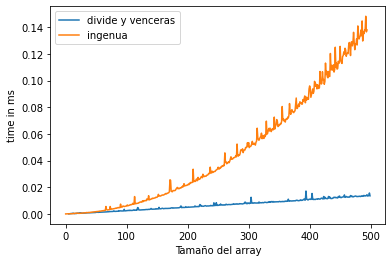

In [10]:
import matplotlib.pyplot as plt
import datetime
import random
from timeit import repeat

x=[]; y=[]; z=[]

for n in range(5,500):

  a = random.sample(range(-1000, 1000), n)

 
  t = repeat(setup="from __main__ import findMaximumSum", stmt=f"findMaximumSum({a})", repeat=1, number=10)
  h = repeat(setup="from __main__ import ingenua", stmt=f"ingenua({a})", repeat=1, number=10)
  
  x.append(n)
  
  y.append(t)
  z.append(h)

plt.plot(x,y,z,)
plt.legend(["divide y venceras","ingenua"])
plt.xlabel('Tamaño del array')
plt.ylabel('time in ms')
plt.show()

# Análisis


La solución ingenua es muy simple y fácil de implementar, pero como se logra ver en el gráfico es muy ineficiente en el peor de los casos tiene una complejidad de O(n^2) con estos resultados frente al enfoque divide y vencerás la diferencia de eficiencia con el algoritmo de kanade es abismal